# Memory Test on Drugged Islanders Data
## Classification of Anti-Anxiety Medicine on Novel Islanders grouped by Happy or Sad Memory Priming
#### Drugs of interest (known-as) [Dosage 1, 2, 3]:

* A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg]

* T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg]

* S- Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

* Dosages follow a 1:1 ratio to ensure validity
* Happy or Sad memories were primed 10 minutes prior to testing
* Participants tested every day for 1 week to mimic addiction

<img src = "https://scx1.b-cdn.net/csz/news/800/2017/memory.jpg"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots


In [2]:
data = pd.read_csv('../input/memory-test-on-drugged-islanders-data/Islander_data.csv')

In [3]:
data.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [5]:
data.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


In [6]:
cleaned_data = data.copy()

## 1.Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Drugs')

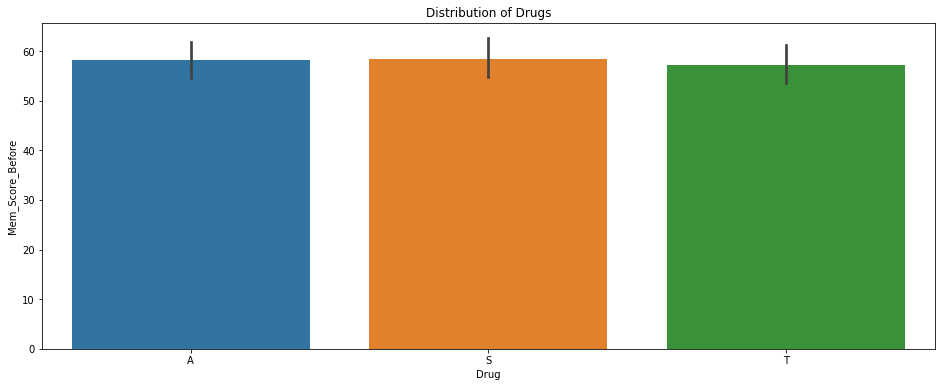

In [7]:
plt.figure(figsize=(16,6))
sns.barplot(x='Drug',y='Mem_Score_Before',data=cleaned_data, order=cleaned_data.Drug.unique().tolist())
plt.title('Distribution of Drugs')

In [8]:
fig = px.bar(cleaned_data, x="age", y="Mem_Score_Before", title="Mem_Score_Before over Age",
             color_discrete_sequence=['#F42272'])
fig.show()

fig = px.bar(cleaned_data, x="age", y="Mem_Score_After", title="Mem_Score_After over Age", 
              log_y=True, color_discrete_sequence=['#F42272'])
fig.show()

In [9]:
fig = px.sunburst(cleaned_data.sort_values(by='age', ascending=False).reset_index(drop=True), 
                 path=["first_name"], values="Mem_Score_Before", height=700,
                 title='Sunburst for Mem_Score_Before ',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [10]:
fig = px.bar(cleaned_data.sort_values('age', ascending=False)[:10][::-1], 
             x='Mem_Score_Before', y='first_name',
             title='Patient with Higest Mem_Score_Before', text='Mem_Score_Before', orientation='h')
fig.show()

In [11]:
fig = px.bar(cleaned_data.sort_values('age', ascending=False)[:10][::-1], 
             x='Mem_Score_After', y='first_name',
             title='Patient with Higest Mem_Score_After', text='Mem_Score_After', orientation='h')
fig.show()

In [12]:
bins = [0, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']

cleaned_data['AgeRange'] = pd.cut(cleaned_data['age'], bins, labels=names)


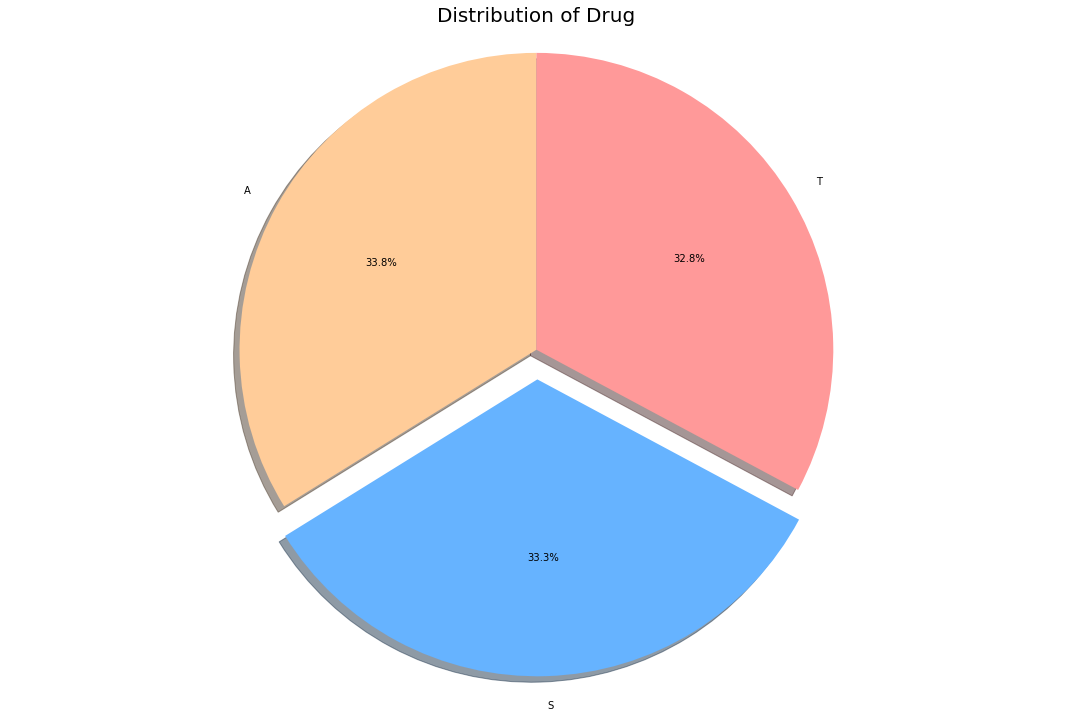

In [13]:
labels = ['A', 'S','T']
sizes = []
sizes.append(list(cleaned_data['Drug'].value_counts())[0])
sizes.append(list(cleaned_data['Drug'].value_counts())[1])
sizes.append(list(cleaned_data['Drug'].value_counts())[2])


explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.title('Distribution of Drug',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

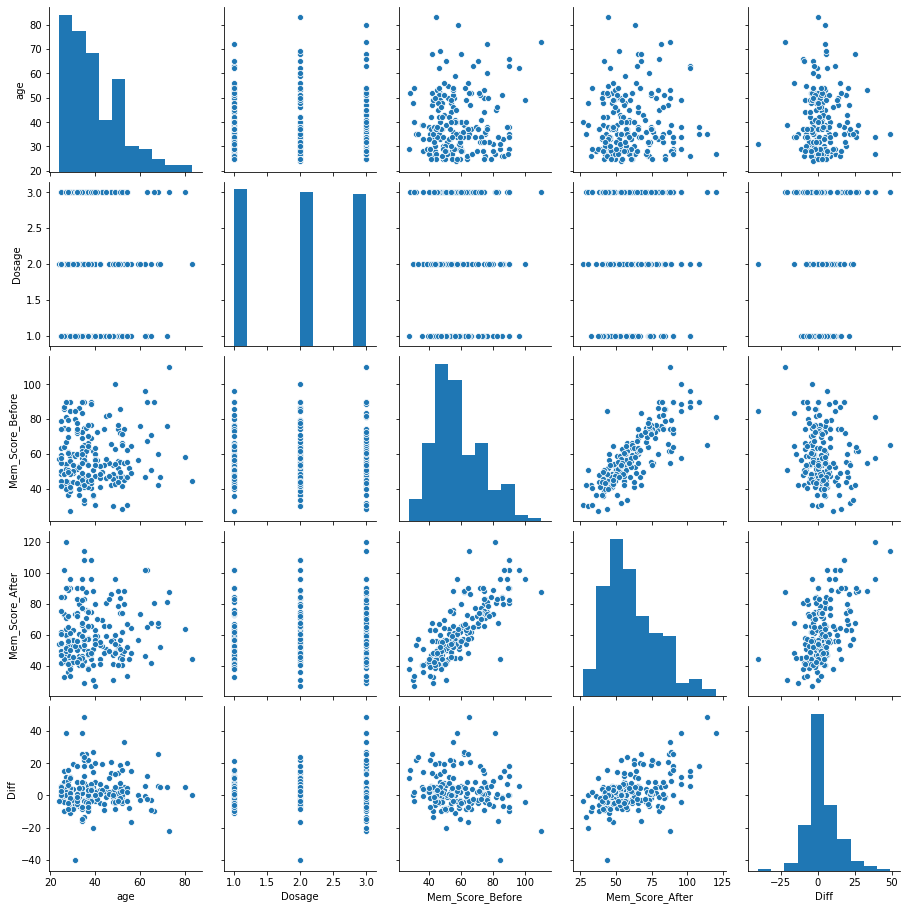

In [14]:
sns.pairplot(cleaned_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05992e1f50>,
      dtype=object)

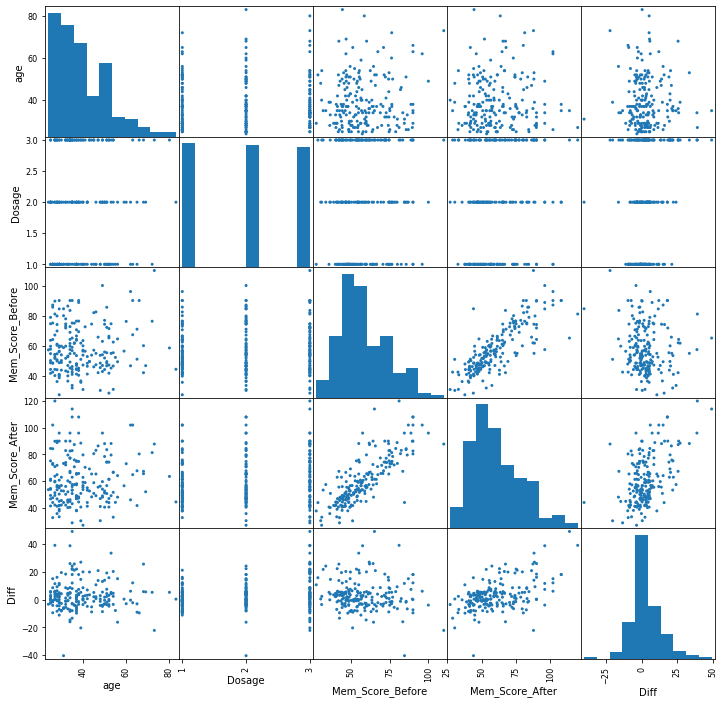

In [15]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(cleaned_data, alpha=1, ax=ax)

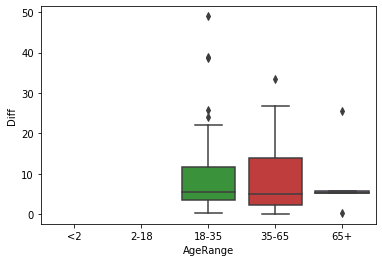

In [16]:
df_plot = cleaned_data[(cleaned_data['Diff']>0)]
sns.boxplot('AgeRange', 'Diff', data=df_plot)

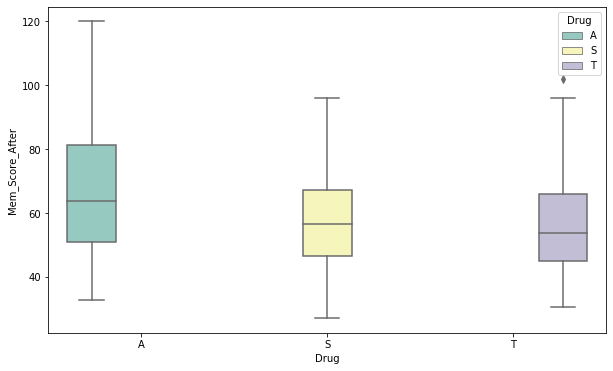

In [17]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="Drug", y="Mem_Score_After", hue="Drug",
                 data=cleaned_data, palette="Set3")

In [18]:
grgs = cleaned_data.groupby(["Drug","Happy_Sad_group"])[["Mem_Score_After"]].mean().reset_index()
fig = px.bar(grgs[['Drug', 'Mem_Score_After','Happy_Sad_group']].sort_values('Mem_Score_After', ascending=False), 
             y="Mem_Score_After", x="Drug", color='Happy_Sad_group', 
             log_y=True, template='plotly_dark')
fig.show()

In [19]:
fig = px.scatter(cleaned_data, x="Mem_Score_Before", y="Mem_Score_After", color="Drug", facet_col="Drug",
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl")
fig.show()

In [20]:
fig = px.scatter(cleaned_data, x="Mem_Score_Before", y="Mem_Score_After", color="Happy_Sad_group", facet_col="Happy_Sad_group",
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl")
fig.show()

In [21]:
df = cleaned_data
fig = px.density_contour(df, x="Mem_Score_Before", y="Mem_Score_After", color="AgeRange", marginal_x="rug", marginal_y="histogram")
fig.show()

In [22]:
fig = px.violin(cleaned_data, y="Diff", x="Happy_Sad_group", color="Happy_Sad_group", box=True, points="all")
fig.show()

In [23]:
fig = px.parallel_categories(cleaned_data, color="age", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [24]:
fig = px.scatter(cleaned_data, x="Mem_Score_Before", y="Diff", size="Mem_Score_Before", color="Drug",
           hover_name="Drug", log_x=True, size_max=60)
fig.show()

In [25]:
fig = px.strip(cleaned_data, x="AgeRange", y="Diff", orientation="h", color="Drug")
fig.show()

In [26]:
ms = cleaned_data.sort_values(by=['age'],ascending=False)
ms = ms.head(30)
fig = px.funnel(ms, x='Mem_Score_Before', y='Happy_Sad_group')
fig.show()

# 2.Data Preprocessing

In [27]:
cleaned_data.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,AgeRange
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,18-35
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,35-65
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,18-35
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,35-65
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,35-65


In [28]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   first_name        198 non-null    object  
 1   last_name         198 non-null    object  
 2   age               198 non-null    int64   
 3   Happy_Sad_group   198 non-null    object  
 4   Dosage            198 non-null    int64   
 5   Drug              198 non-null    object  
 6   Mem_Score_Before  198 non-null    float64 
 7   Mem_Score_After   198 non-null    float64 
 8   Diff              198 non-null    float64 
 9   AgeRange          198 non-null    category
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 14.4+ KB


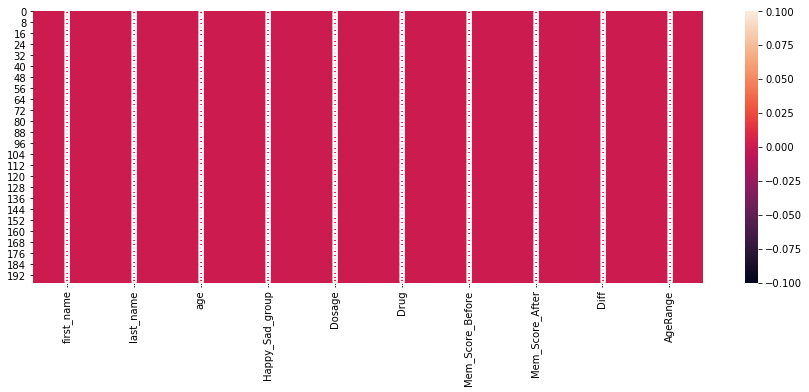

In [29]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(cleaned_data.isnull(), annot=True)

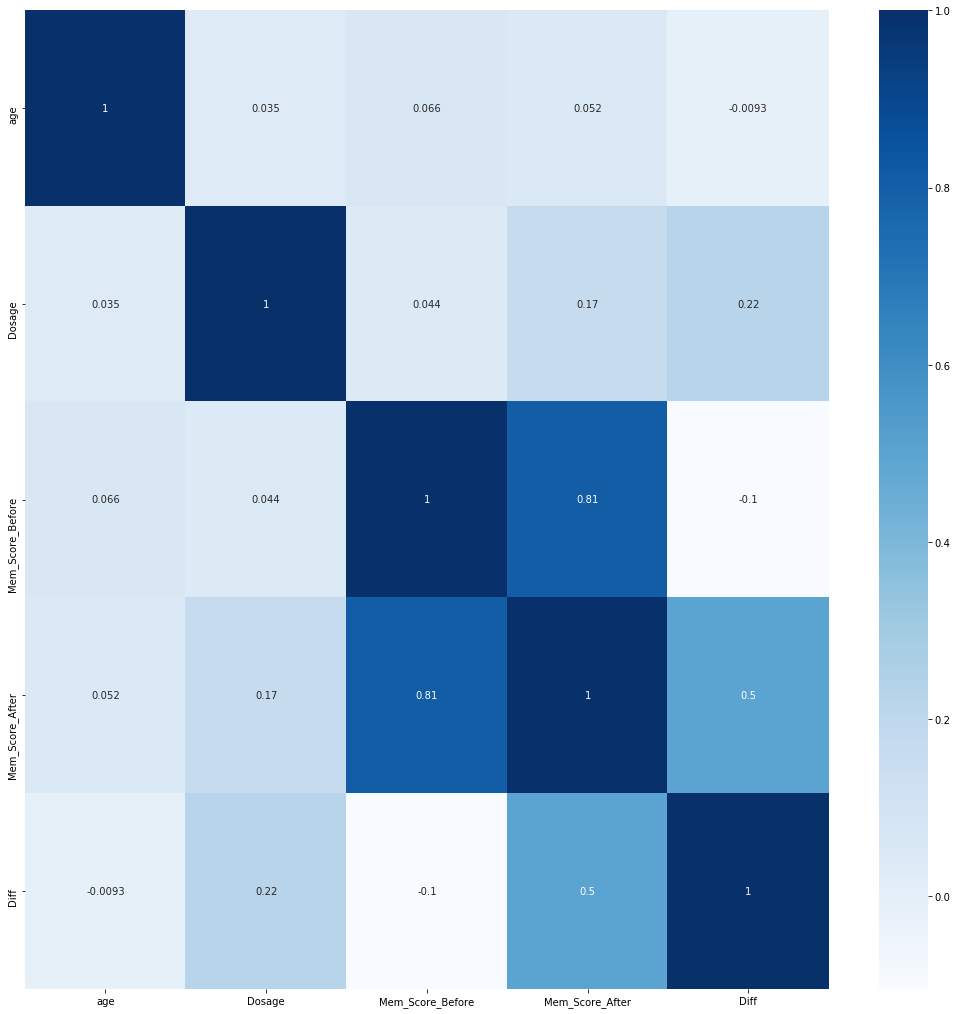

In [30]:
fig=plt.figure(figsize=(18,18))
sns.heatmap(cleaned_data.corr(), annot= True, cmap='Blues')


In [31]:
preprocessed_data = cleaned_data.drop(['first_name','last_name','Happy_Sad_group'],axis=1)

In [32]:
cleaned_data.Happy_Sad_group = cleaned_data.Happy_Sad_group.apply(lambda x: 1 if x == 'H' else 0)
data_label=cleaned_data['Happy_Sad_group']
del data['Happy_Sad_group']
data_label=pd.DataFrame(data_label)

In [33]:
preprocessed_data = pd.get_dummies(preprocessed_data,columns=['Drug','AgeRange'],drop_first=True)

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled=MinMaxScaler().fit_transform(preprocessed_data)
data_scaled=pd.DataFrame(data=data_scaled, columns=preprocessed_data.columns)

In [35]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_scaled, data_label, test_size=0.10,
                                             stratify=data_label,random_state=121)

# 3.Predictive Analysis

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import StackingClassifier Need to update sklearn to use inbuilt stacking classifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [37]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

Accuracy is :  0.44406779661016954
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 1, 'F1 Score = 0.5714285714285713')

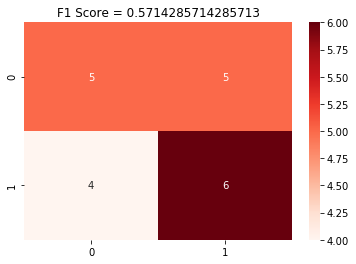

In [38]:
modelk=KNeighborsClassifier(algorithm='auto',n_neighbors= 5)
score_k=CrossVal(Xtrain,Ytrain,modelk)
print("Accuracy is : ",score_k)
modelk.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modelk.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modelk.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,modelk.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

Accuracy is :  0.39858757062146893
              precision    recall  f1-score   support

           0       0.25      0.20      0.22        10
           1       0.33      0.40      0.36        10

    accuracy                           0.30        20
   macro avg       0.29      0.30      0.29        20
weighted avg       0.29      0.30      0.29        20



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 1, 'F1 Score = 0.3636363636363636')

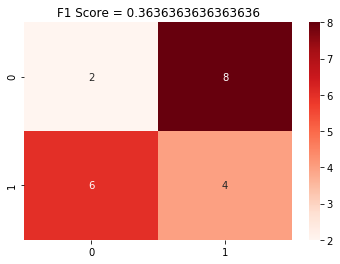

In [39]:
modellog=LogisticRegression()
score_k=CrossVal(Xtrain,Ytrain,modellog)
print("Accuracy is : ",score_k)
modellog.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modellog.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modellog.predict(Xtest)), annot= True, cmap='Reds')
log_f1=f1_score(Ytest,modellog.predict(Xtest))
plt.title('F1 Score = {}'.format(log_f1))

Accuracy is :  0.48879472693032017
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.50      0.60      0.55        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20



Text(0.5, 1, 'F1 Score = 0.5454545454545454')

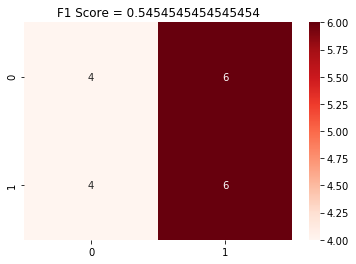

In [40]:
modeldt=DecisionTreeClassifier(max_depth=6)
score_k=CrossVal(Xtrain,Ytrain,modeldt)
print("Accuracy is : ",score_k)
modeldt.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modeldt.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modeldt.predict(Xtest)), annot= True, cmap='Reds')
dt_f1=f1_score(Ytest,modeldt.predict(Xtest))
plt.title('F1 Score = {}'.format(dt_f1))

Accuracy is :  0.48323917137476463
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.50      0.80      0.62        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 1, 'F1 Score = 0.6153846153846154')

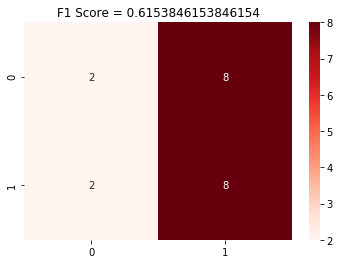

In [41]:
modelsvc=SVC(C=0.2,probability=True,kernel='rbf',gamma=0.1)
score_k=CrossVal(Xtrain,Ytrain,modelsvc)
print("Accuracy is : ",score_k)
modelsvc.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modelsvc.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modelsvc.predict(Xtest)), annot= True, cmap='Reds')
svc_f1=f1_score(Ytest,modelsvc.predict(Xtest))
plt.title('F1 Score = {}'.format(svc_f1))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy is :  0.4664783427495292


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.45      0.50      0.48        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



Text(0.5, 1, 'F1 Score = 0.47619047619047616')

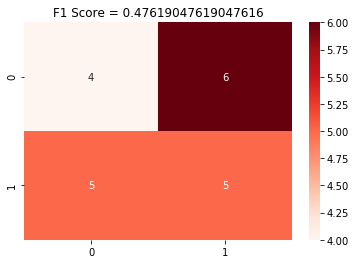

In [42]:
modelrt=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=97)
score_k=CrossVal(Xtrain,Ytrain,modelrt)
print("Accuracy is : ",score_k)
modelrt.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modelrt.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modelrt.predict(Xtest)), annot= True, cmap='Reds')
rt_f1=f1_score(Ytest,modelrt.predict(Xtest))
plt.title('F1 Score = {}'.format(rt_f1))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy is :  0.49416195856873824


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20



Text(0.5, 1, 'F1 Score = 0.5')

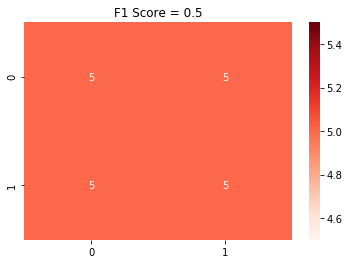

In [43]:
modelext=ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=2)
score_k=CrossVal(Xtrain,Ytrain,modelext)
print("Accuracy is : ",score_k)
modelext.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modelext.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modelext.predict(Xtest)), annot= True, cmap='Reds')
ext_f1=f1_score(Ytest,modelext.predict(Xtest))
plt.title('F1 Score = {}'.format(ext_f1))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy is :  0.432391713747646


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.50      0.30      0.37        10
           1       0.50      0.70      0.58        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20



Text(0.5, 1, 'F1 Score = 0.5833333333333334')

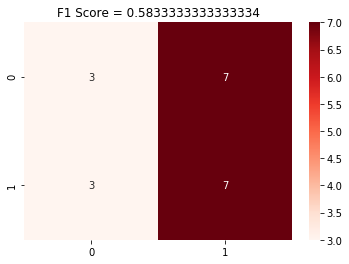

In [44]:
modelada=AdaBoostClassifier(modellog,n_estimators=100, random_state=343, learning_rate=0.012)

score_k=CrossVal(Xtrain,Ytrain,modelada)
print("Accuracy is : ",score_k)
modelada.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modelada.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modelada.predict(Xtest)), annot= True, cmap='Reds')
ada_f1=f1_score(Ytest,modelada.predict(Xtest))
plt.title('F1 Score = {}'.format(ada_f1))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy is :  0.5222222222222223
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.50      0.60      0.55        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 1, 'F1 Score = 0.5454545454545454')

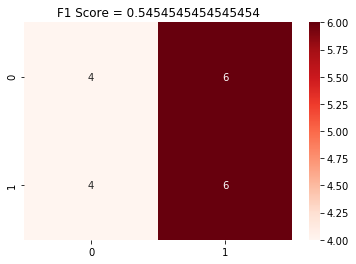

In [45]:
modelgbc=GradientBoostingClassifier(n_estimators=100, random_state=43, learning_rate = 0.01)

score_k=CrossVal(Xtrain,Ytrain,modelgbc)
print("Accuracy is : ",score_k)
modelgbc.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modelgbc.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modelgbc.predict(Xtest)), annot= True, cmap='Reds')
gbc_f1=f1_score(Ytest,modelgbc.predict(Xtest))
plt.title('F1 Score = {}'.format(gbc_f1))

Text(0.5, 1.0, 'Feature Importance for Random Forest Classifier')

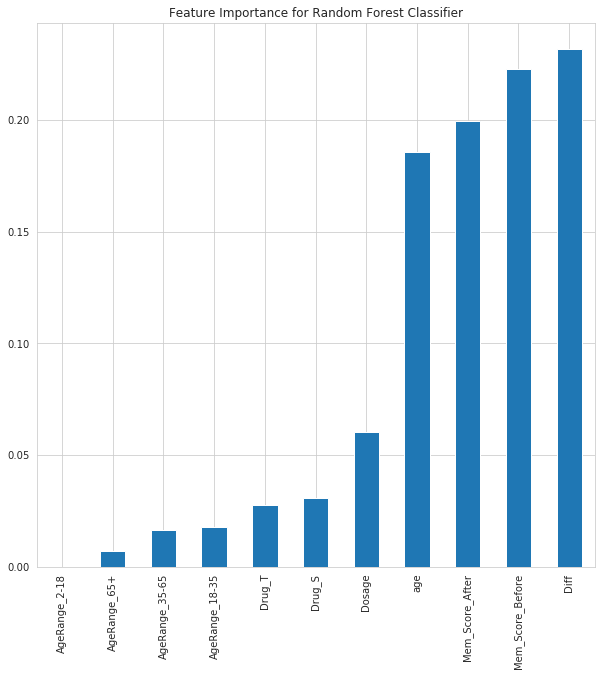

In [46]:
fig= plt.figure(figsize=(10,10))
important=pd.Series(modelrt.feature_importances_, index=Xtrain.columns)
sns.set_style('whitegrid')
important.sort_values().plot.bar()
plt.title('Feature Importance for Random Forest Classifier')

Text(0.5, 1.0, 'Model F1 Score Comparison')

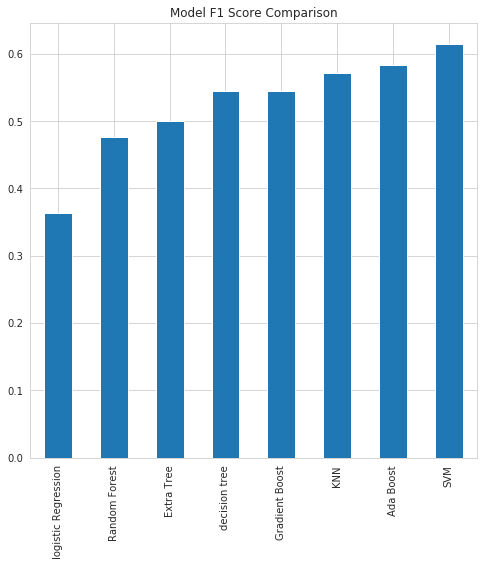

In [47]:
model_f1_score = pd.Series(data=[k_f1, log_f1, dt_f1, svc_f1, rt_f1, ext_f1, ada_f1, 
                           gbc_f1], 
                           index=['KNN','logistic Regression','decision tree', 'SVM', 'Random Forest',
                                'Extra Tree', 'Ada Boost' , 'Gradient Boost'])
fig= plt.figure(figsize=(8,8))
model_f1_score.sort_values().plot.bar()
plt.title('Model F1 Score Comparison')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy is :  0.432391713747646
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 1, 'F1 Score = 0.5714285714285713')

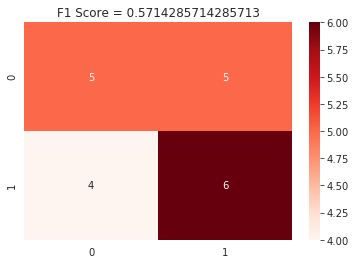

In [48]:
modelvc=VotingClassifier(estimators=[('knn',modelk),('SGD',modelsvc),('lr',modellog)],
                    voting='soft')

score_k=CrossVal(Xtrain,Ytrain,modelada)
print("Accuracy is : ",score_k)
modelvc.fit(Xtrain,Ytrain)
cr = classification_report(Ytest, modelvc.predict(Xtest))
print(cr)

# confusion matrix 

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,modelvc.predict(Xtest)), annot= True, cmap='Reds')
model_vc_f1=f1_score(Ytest,modelvc.predict(Xtest))
plt.title('F1 Score = {}'.format(model_vc_f1))

<b> More Predictive Analysis in Pipeline. And don't Hesitate to give an upvote if you like it </b>